# In this project we will be doing a FIFA data set data cleaning, data transformation, data analysis and perform some calculations...

## First import libraries

In [410]:
import pandas as pd #For all type of calculations
import numpy as np # for array type of values
import matplotlib.pyplot as plt #For plotting and showing or displaying images
import seaborn as sns #For statistical plotting
import re #Regural expression
from sklearn.preprocessing import StandardScaler # TO make changes in anything categorical or numerical values or to standerdize

## Importing the dataset

In [411]:
data = pd.read_csv("fifa21_raw_data.csv", low_memory=False)
data.sample(5)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
10341,https://cdn.sofifa.com/players/253/858/21_60.png,José Yegüez,http://sofifa.com/player/253858/jose-yeguez/21...,Venezuela,LB LM,J. Yegüez,32,65,65,\n\n\n\nAragua FC\n2019 ~ 2024\n\n,...,Medium,Medium,1 ★,73,40,55,57,61,59,\n1
11569,https://cdn.sofifa.com/players/215/211/21_60.png,Baily Cargill,http://sofifa.com/player/215211/baily-cargill/...,England,CB,B. Cargill,24,64,70,\n\n\n\nMilton Keynes Dons\n2018 ~ 2021\n\n,...,Medium,High,1 ★,58,34,58,57,64,67,\n15
11980,https://cdn.sofifa.com/players/211/463/21_60.png,Caolan Lavery,http://sofifa.com/player/211463/caolan-lavery/...,Northern Ireland,ST,C. Lavery,27,63,64,\n\n\n\nWalsall\n2019 ~ 2021\n\n,...,Medium,Medium,1 ★,75,62,56,63,39,66,\n10
17852,https://cdn.sofifa.com/players/248/047/21_60.png,Ionuț Rus,http://sofifa.com/player/248047/ionut-rus/210005/,Romania,GK,I. Rus,20,55,72,\n\n\n\nCFR Cluj\n2019 ~ 2023\n\n,...,Medium,Medium,1 ★,56,60,55,57,31,50,\n3
6065,https://cdn.sofifa.com/players/232/364/21_60.png,Dimitris Chatziisaias,http://sofifa.com/player/232364/dimitris-chatz...,Greece,CB,D. Chatziisaias,27,69,71,\n\n\n\nÇaykur Rizespor\n2019 ~ 2022\n\n,...,Low,High,1 ★,57,41,44,47,70,75,\n2


### Now we will be perform some basic operations to see some basic statistics

In [412]:
#To get the types of data we are dealing with
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [413]:
#Finding the null data values
missing_values = data.isnull().sum()
# Filter columns with missing values only (greater than 0)
missing_values = missing_values[missing_values > 0]
# Calculate the percentage of missing values for each column
missing_values_percentage = (missing_values / len(data)) * 100
# Format and print the percentages
print(missing_values_percentage.apply(lambda x: f"{x:.2f}%"))


Loan Date End    94.66%
dtype: object


In [414]:
#Describing our data so that we can see which numerical columns we will see
data.describe()

,Age,↓OVA,POT,ID,BOV,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,...,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,25.194583,65.718636,71.136098,226404.790242,66.751620,5.417461,248.938616,49.688551,45.842932,51.941883,...,16.217609,16.519205,1595.293851,355.703040,67.454239,53.457716,57.681069,62.875494,49.865904,64.368618
std,4.710753,6.968999,6.114176,27141.673349,6.747017,5.663954,74.299764,18.131334,19.566978,17.293626,...,17.002134,17.854185,269.883542,40.762282,10.678058,13.827229,10.081914,9.927875,16.442730,9.601665
min,16.000000,47.000000,47.000000,41.000000,48.000000,0.000000,42.000000,6.000000,3.000000,5.000000,...,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,21.000000,61.000000,67.000000,210135.000000,62.000000,0.000000,222.000000,38.000000,30.000000,44.000000,...,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,25.000000,66.000000,71.000000,232424.000000,67.000000,4.000000,263.000000,54.000000,49.000000,55.000000,...,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,29.000000,70.000000,75.000000,246925.500000,71.000000,9.000000,297.000000,63.000000,62.000000,64.000000,...,14.000000,14.000000,1781.000000,384.000000,75.000000,64.000000,64.000000,69.000000,63.000000,71.000000
max,53.000000,93.000000,95.000000,259216.000000,93.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,91.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,91.000000


In [415]:
data.iloc[0:10]

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
5,https://cdn.sofifa.com/players/188/545/21_60.png,Robert Lewandowski,http://sofifa.com/player/188545/robert-lewando...,Poland,ST,R. Lewandowski,31,91,91,\n\n\n\nFC Bayern München\n2014 ~ 2023\n\n,...,High,Medium,4 ★,78,91,78,85,43,82,\n182
6,https://cdn.sofifa.com/players/231/747/21_60.png,Kylian Mbappé,http://sofifa.com/player/231747/kylian-mbappe/...,France,ST LW RW,K. Mbappé,21,90,95,\n\n\n\nParis Saint-Germain\n2018 ~ 2022\n\n,...,High,Low,3 ★,96,86,78,91,39,76,\n646
7,https://cdn.sofifa.com/players/212/831/21_60.png,Alisson Ramses Becker,http://sofifa.com/player/212831/alisson-ramses...,Brazil,GK,Alisson,27,90,91,\n\n\n\nLiverpool\n2018 ~ 2024\n\n,...,Medium,Medium,3 ★,86,88,85,89,51,91,\n79
8,https://cdn.sofifa.com/players/209/331/21_60.png,Mohamed Salah,http://sofifa.com/player/209331/mohamed-salah/...,Egypt,RW,M. Salah,28,90,90,\n\n\n\nLiverpool\n2017 ~ 2023\n\n,...,High,Medium,3 ★,93,86,81,90,45,75,\n164
9,https://cdn.sofifa.com/players/208/722/21_60.png,Sadio Mané,http://sofifa.com/player/208722/sadio-mane/210...,Senegal,LW,S. Mané,28,90,90,\n\n\n\nLiverpool\n2016 ~ 2023\n\n,...,High,Medium,3 ★,94,85,80,90,44,76,\n170


In [416]:
#Finding the shape
data.shape

(18979, 77)

In [417]:
#Find the columns
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', '↓OVA', 'POT', 'Team & Contract', 'ID', 'Height', 'Weight',
       'foot', 'BOV', 'BP', 'Growth', 'Joined', 'Loan Date End', 'Value',
       'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 'PHY', 'Hits

## Renaming the columns and cleaning some data

In [418]:
# Define the column renaming mapping
rename_columns = {
    '↓OVA': 'Overall',
    'POT': 'Potential',
    'W/F': 'Weak Foot',
    'SM': 'Skill Moves',
    'A/W': 'Attacking Work Rate',
    'D/W': 'Defensive Work Rate',
    'IR': 'International Reputation',
    'PAC': 'Pace',
    'BOV': 'Body Value',
    'BP' : 'Balance Points',
    'SHO': 'Shooting',
    'PAS': 'Passing',
    'DRI': 'Dribbling',
    'DEF': 'Defense',
    'PHY': 'Physical'
}

# Rename the columns
data.rename(columns=rename_columns, inplace=True)

# Function to clean unwanted characters from the data
def clean_data(value):
    if isinstance(value, str):
        value = value.replace('★', '').replace('\n', '').strip()
    return value

# Apply the cleaning function to the entire dataframe
data = data.map(clean_data)

# Display the first few rows and updated column names to verify the changes
data.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,Overall,Potential,Team & Contract,...,Attacking Work Rate,Defensive Work Rate,International Reputation,Pace,Shooting,Passing,Dribbling,Defense,Physical,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,FC Barcelona2004 ~ 2021,...,Medium,Low,5,85,92,91,95,38,65,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,Juventus2018 ~ 2022,...,High,Low,5,89,93,81,89,35,77,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,Atlético Madrid2014 ~ 2023,...,Medium,Medium,3,87,92,78,90,52,90,86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,Manchester City2015 ~ 2023,...,High,High,4,76,86,93,88,64,78,163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,Paris Saint-Germain2017 ~ 2022,...,High,Medium,5,91,85,86,94,36,59,273


In [419]:
data.columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Age', 'Overall', 'Potential', 'Team & Contract', 'ID', 'Height',
       'Weight', 'foot', 'Body Value', 'Balance Points', 'Growth', 'Joined',
       'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Attacking',
       'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility',
       'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina',
       'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending',
       'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Total Stats', 'Base Stats', 'Weak Foot', 'Skill Moves',
       'Attacking Work Rate', '

In [420]:
# We will now perform unqiue operations to extract for the further analysis
# Select columns with dtype 'object'
categorical_columns = data.select_dtypes(include=['object']).columns
# Dictionary to store unique values
unique_values = {col: data[col].unique() for col in categorical_columns}
for col, values in unique_values.items():
    print(f"Unique values for {col}:")
    print(values)


Unique values for photoUrl:
['https://cdn.sofifa.com/players/158/023/21_60.png'
 'https://cdn.sofifa.com/players/020/801/21_60.png'
 'https://cdn.sofifa.com/players/200/389/21_60.png' ...
 'https://cdn.sofifa.com/players/247/223/21_60.png'
 'https://cdn.sofifa.com/players/258/760/21_60.png'
 'https://cdn.sofifa.com/players/255/958/21_60.png']
Unique values for LongName:
['Lionel Messi' 'C. Ronaldo dos Santos Aveiro' 'Jan Oblak' ... 'Ao Xia'
 'Ben Hough' 'Mateo Flores']
Unique values for playerUrl:
['http://sofifa.com/player/158023/lionel-messi/210005/'
 'http://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/210005/'
 'http://sofifa.com/player/200389/jan-oblak/210005/' ...
 'http://sofifa.com/player/247223/ao-xia/210005/'
 'http://sofifa.com/player/258760/ben-hough/210005/'
 'http://sofifa.com/player/255958/mateo-flores/210005/']
Unique values for Nationality:
['Argentina' 'Portugal' 'Slovenia' 'Belgium' 'Brazil' 'Poland' 'France'
 'Egypt' 'Senegal' 'Netherlands' 'Germany' 'Spain' 

### We don't need photourl and playerurl for analysis so we removing this

In [421]:
data.drop(columns=['photoUrl', 'playerUrl'], inplace=True)

# We need to know the positions and it's descriptives so we can understand what that is:
### Individual Positions

- **GK (Goalkeeper):** The player who guards the goal and tries to prevent the opposing team from scoring.
- **CB (Center Back):** A central defender positioned in the middle of the defense line.
- **RB (Right Back):** A defender positioned on the right side of the defense.
- **LB (Left Back):** A defender positioned on the left side of the defense.
- **CDM (Central Defensive Midfielder):** A midfielder who plays a defensive role in the central part of the field.
- **CM (Central Midfielder):** A midfielder who plays in the central area of the field, often involved in both defensive and offensive plays.
- **RM (Right Midfielder):** A midfielder positioned on the right side of the field.
- **LM (Left Midfielder):** A midfielder positioned on the left side of the field.
- **CAM (Central Attacking Midfielder):** A midfielder who plays in an advanced central position, focusing on creating scoring opportunities.
- **RW (Right Winger):** An attacking player positioned on the right side of the field, often responsible for crossing the ball and creating scoring chances.
- **LW (Left Winger):** An attacking player positioned on the left side of the field, similar to the right winger.
- **ST (Striker):** The primary attacking player whose main role is to score goals.
- **CF (Center Forward):** A forward player who is positioned centrally in the attack, similar to a striker.

### Combinations of Positions

- **RW ST CF:** A player who operates primarily as a right winger but can also play as a striker and center forward.
- **ST LW:** A player who plays as a striker but can also function as a left winger.
- **GK:** Goalkeeper.
- **CAM CM:** A player who can play both as a central attacking midfielder and a central midfielder.
- **LW CAM:** A player who operates as a left winger but can also play as a central attacking midfielder.
- **ST:** Striker.
- **ST LW RW:** A player who can play as a striker, left winger, and right winger.
- **RW:** Right Winger.
- **LW:** Left Winger.
- **CB:** Center Back.
- **CDM:** Central Defensive Midfielder.
- **CF ST:** A player who plays as a center forward and striker.
- **CDM CM:** A player who can play both as a central defensive midfielder and a central midfielder.
- **CDM RB:** A player who can function as both a central defensive midfielder and a right back.
- **CF CAM:** A player who can play as a center forward and central attacking midfielder.
- **LW RW:** A player who can play as both a left winger and a right winger.
- **LW ST:** A player who plays as a left winger but can also function as a striker.
- **CM:** Central Midfielder.
- **RM LM CAM:** A player who can play as a right midfielder, left midfielder, and central attacking midfielder.
- **RB:** Right Back.
- **RW CAM CM:** A player who can play as a right winger, central attacking midfielder, and central midfielder.
- **LB:** Left Back.
- **CF:** Center Forward.
- **LM CF:** A player who can play as a left midfielder and center forward.
- **ST CF LW:** A player who can play as a striker, center forward, and left winger.
- **RW LW:** A player who can play as both a right winger and a left winger.
- **CM CDM:** A player who plays as both a central midfielder and a central defensive midfielder.
- **CAM RM RW:** A player who can play as a central attacking midfielder, right midfielder, and right winger.
- **CAM CF ST:** A player who can play as a central attacking midfielder, center forward, and striker.
- **CAM RM CF:** A player who can play as a central attacking midfielder, right midfielder, and center forward.
- **LM ST:** A player who can play as a left midfielder and striker.
- **CM CDM CAM:** A player who can play as a central midfielder, central defensive midfielder, and central attacking midfielder.
- **LM:** Left Midfielder.
- **CAM RW:** A player who can play as a central attacking midfielder and right winger.
- **CB CDM:** A player who can play as both a center back and a central defensive midfielder.
- **RM LM RW:** A player who can play as a right midfielder, left midfielder, and right winger.
- **RW RM:** A player who can play as a right winger and right midfielder.
- **CF LW CAM:** A player who can play as a center forward, left winger, and central attacking midfielder.
- **CAM CM CF:** A player who can play as a central attacking midfielder, central midfielder, and center forward.
- **LW CF:** A player who can play as a left winger and center forward.
- **CM RM LM:** A player who can play as a central midfielder, right midfielder, and left midfielder.
- **LB LM:** A player who can play as a left back and left midfielder.
- **CAM CM RM:** A player who can play as a central attacking midfielder, central midfielder, and right midfielder.
- **CAM CF:** A player who can play as a central attacking midfielder and center forward.
- **LM RM LW:** A player who can play as a left midfielder, right midfielder, and left winger.
- **LM LB CM:** A player who can play as a left midfielder, left back, and central midfielder.
- **CM LM LB:** A player who can play as a central midfielder, left midfielder, and left back.
- **RM CM:** A player who can play as a right midfielder and central midfielder.
- **CAM CM LW:** A player who can play as a central attacking midfielder, central midfielder, and left winger.
- **CB LB:** A player who can play as a center back and left back.
- **RM RB:** A player who can play as a right midfielder and right back.
- **ST RW:** A player who can play as a striker and right winger.
- **LM RW LW:** A player who can play as a left midfielder, right winger, and left winger.
- **RM RW:** A player who can play as a right midfielder and right winger.
- **RB LB:** A player who can play as both a right back and left back.
- **RB RM:** A player who can play as a right back and right midfielder.
- **RM:** Right Midfielder.
- **CAM RM:** A player who can play as a central attacking midfielder and right midfielder.
- **RB RWB:** A player who can function as both a right back and a right wing back.
- **CDM CB CM:** A player who can play as a central defensive midfielder, center back, and central midfielder.
- **LM LW RM:** A player who can play as a left midfielder, left winger, and right midfielder.
- **CM CAM:** A player who can play as both a central midfielder and a central attacking midfielder.
- **CAM RM ST:** A player who can play as a central attacking midfielder, right midfielder, and striker.
- **LM RM:** A player who can play as both a left midfielder and a right midfielder.
- **LM LWB:** A player who can play as a left midfielder and left wing back.
- **ST RM CF:** A player who can play as a striker, right midfielder, and center forward.
- **RW RM CF:** A player who can play as a right winger, right midfielder, and center forward.
- **LM RM CF:** A player who can play as a left midfielder, right midfielder, and center forward.
- **RM CF:** A player who can play as both a right midfielder and a center forward.
- **RB CM:** A player who can play as a right back and central midfielder.
- **LW CAM RW:** A player who can play as a left winger, central attacking midfielder, and right winger.
- **CAM LW CM:** A player who can play as a central attacking midfielder, left winger, and central midfielder.
- **CM CAM CDM:** A player who can play as a central midfielder, central attacking midfielder, and central defensive midfielder.
- **RW LW CAM:** A player who can play as a right winger, left winger, and central attacking midfielder.
- **CM CAM LM:** A player who can play as a central midfielder, central attacking midfielder, and left midfielder.
- **CM RM ST:** A player who can play as a central midfielder, right midfielder, and striker.
- **CDM CM RB:** A player who can play as a central defensive midfielder, central midfielder, and right back.
- **ST CAM:** A player who can play as both a striker and central attacking midfielder.
- **RM ST:** A player who can play as both a right midfielder and striker.
- **LB CB LWB:** A player who can play as a left back, center back, and left wing back.
- **CAM LW ST:** A player who can play as a central attacking midfielder, left winger, and striker.
- **RWB RM:** A player who can play as a right wing back and right midfielder.
- **CB CDM LB:** A player who can play as a center back, central defensive midfielder, and left back.
- **CM LM RM:** A player who can play as a central midfielder, left midfielder, and right midfielder.
- **LM LW:** A player who can play as a left midfielder and left winger.
- **RW LW RM:** A player who can play as a right winger, left winger, and right midfielder.
- **RB CDM CM:** A player who can play as a right back, central defensive midfielder, and central midfielder.
- **CB CDM CM:** A player who can play as a center back, central defensive midfielder, and central midfielder.
- **CAM RW ST:** A player who can play as a central attacking midfielder, right winger, and striker.
- **CM RWB:** A player who can play as both a central midfielder and a right wing back.
- **CB CAM:** A player who can play as a center back and central attacking midfielder.
- **RM LB:** A player who can play as a right midfielder and left back.
- **RB CDM CM:** A player who can play as a right back, central defensive midfielder, and central midfielder.
- **RB RM CAM:** A player who can play as a right back, right midfielder, and central attacking midfielder.
- **LW CAM ST:** A player who can play as a left winger, central attacking midfielder, and striker.
- **CM CAM LW:** A player who can play as a central midfielder, central attacking midfielder, and left winger.
- **CB CDM:** A player who can play as both a center back and central defensive midfielder.
- **CAM LW CM:** A player who can play as a central attacking midfielder, left winger, and central midfielder.
- **CB RB LB:** A player who can play as a center back, right back, and left back.
- **CB CM:** A player who can play as a center back and central midfielder.
- **CAM CM CDM:** A player who can play as a central attacking midfielder, central midfielder, and central defensive midfielder.
- **LW ST:** A player who can play as both a left winger and striker.
- **RB CM LM:** A player who can play as a right back, central midfielder, and left midfielder.
- **RW LW:** A player who can play as both a right winger and left winger.
- **CAM CM CDM:** A player who can play as a central attacking midfielder, central midfielder, and central defensive midfielder.
- **RW CAM:** A player who can play as both a right winger and central attacking midfielder.
- **RM CAM RW:** A player who can play as a right midfielder, central attacking midfielder, and right winger.
- **RB LW:** A player who can play as a right back and left winger.
- **ST CM:** A player who can play as a striker and central midfielder.
- **RB RWB RW:** A player who can play as a right back, right wing back, and right winger.
- **CM LB:** A player who can play as a central midfielder and left back.
- **RB CDM CAM:** A player who can play as a right back, central defensive midfielder, and central attacking midfielder.
- **CAM RWB:** A player who can play as a central attacking midfielder and right wing back.
- **LW RW:** A player who can play as both a left winger and right winger.
- **ST LB:** A player who can play as a striker and left back.
- **CAM RW ST:** A player who can play as a central attacking midfielder, right winger, and striker.
- **CM RB:** A player who can play as a central midfielder and right back.
- **CAM LW ST:** A player who can play as a central attacking midfielder, left winger, and striker.
- **ST RWB:** A player who can play as both a striker and right wing back.
- **RB CDM:** A player who can play as a right back and central defensive midfielder.
- **CAM CM CDM:** A player who can play as a central attacking midfielder, central midfielder, and central defensive midfielder.
- **CB LB RB:** A player who can play as a center back, left back, and right back.
- **ST CAM:** A player who can play as both a striker and central attacking midfielder.
 and a central defensive midfielder.


### Now if u have columns missing values greater than 70% we can drop that column

In [422]:
data.drop(columns=['Loan Date End'] , inplace =True)

## We will convert the weight and height to inchs and kg's

In [423]:
print(data[['Height', 'Weight']])

      Height  Weight
0       5'7"  159lbs
1       6'2"  183lbs
2       6'2"  192lbs
3      5'11"  154lbs
4       5'9"  150lbs
...      ...     ...
18974  5'10"  154lbs
18975   5'7"  128lbs
18976  5'10"  146lbs
18977   5'9"  143lbs
18978   5'9"  150lbs

[18979 rows x 2 columns]


In [424]:

# Function to convert height from '5\'7"' to centimeters
def height_to_cm(height_str):
    match = re.match(r"(\d+)'(\d+)\"", height_str)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        total_inches = feet * 12 + inches
        return total_inches * 2.54
    return None

# Function to convert weight from '159lbs' to kilograms
def weight_to_kg(weight_str):
    match = re.match(r"(\d+)lbs", weight_str)
    if match:
        pounds = int(match.group(1))
        return pounds * 0.453592
    return None

# Convert heights and weights in the existing DataFrame
data['Height_cm'] = data['Height'].apply(height_to_cm)
data['Weight_kg'] = data['Weight'].apply(weight_to_kg)

# Drop the original 'Height' and 'Weight' columns if no longer needed
# data = data.drop(columns=['Height', 'Weight'])

# Print the updated DataFrame
print(data[['Height_cm', 'Weight_kg']])

       Height_cm  Weight_kg
0         170.18  72.121128
1         187.96  83.007336
2         187.96  87.089664
3         180.34  69.853168
4         175.26  68.038800
...          ...        ...
18974     177.80  69.853168
18975     170.18  58.059776
18976     177.80  66.224432
18977     175.26  64.863656
18978     175.26  68.038800

[18979 rows x 2 columns]


In [425]:
data.drop(columns= ['Height', 'Weight'], inplace = True )

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 74 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LongName                  18979 non-null  object 
 1   Nationality               18979 non-null  object 
 2   Positions                 18979 non-null  object 
 3   Name                      18979 non-null  object 
 4   Age                       18979 non-null  int64  
 5   Overall                   18979 non-null  int64  
 6   Potential                 18979 non-null  int64  
 7   Team & Contract           18979 non-null  object 
 8   ID                        18979 non-null  int64  
 9   foot                      18979 non-null  object 
 10  Body Value                18979 non-null  int64  
 11  Balance Points            18979 non-null  object 
 12  Growth                    18979 non-null  int64  
 13  Joined                    18979 non-null  object 
 14  Value 

### Lets Drop ID we have no use of that 

In [427]:
data.drop(columns = ['ID'], inplace = True)

In [428]:
data.sample()

,LongName,Nationality,Positions,Name,Age,Overall,Potential,Team & Contract,foot,Body Value,...,International Reputation,Pace,Shooting,Passing,Dribbling,Defense,Physical,Hits,Height_cm,Weight_kg
13027,Kentaro Seki,Japan,GK,K. Seki,34,62,62,Vegalta Sendai2008 ~ 2021,Right,62,...,1,57,61,61,62,25,63,1,177.8,78.017824


In [429]:
data['Team & Contract']

0                               FC Barcelona2004 ~ 2021
1                                   Juventus2018 ~ 2022
2                            Atlético Madrid2014 ~ 2023
3                            Manchester City2015 ~ 2023
4                        Paris Saint-Germain2017 ~ 2022
                              ...                      
18974    Chongqing Dangdai Lifan FC SWM Team2020 ~ 2020
18975                        Oldham Athletic2020 ~ 2021
18976                             Wuhan Zall2018 ~ 2022
18977                        Oldham Athletic2020 ~ 2021
18978                           Club Bolívar2020 ~ 2024
Name: Team & Contract, Length: 18979, dtype: object

In [430]:
# Split 'Team & Contract' column into 'Team' and 'Contract'
data[['Team', 'Contract']] = data['Team & Contract'].str.split(' ~ ', expand=True)



In [431]:
# Print the updated DataFrame
print(data[['Contract', 'Team']])

      Contract                                     Team
0         2021                         FC Barcelona2004
1         2022                             Juventus2018
2         2023                      Atlético Madrid2014
3         2023                      Manchester City2015
4         2022                  Paris Saint-Germain2017
...        ...                                      ...
18974     2020  Chongqing Dangdai Lifan FC SWM Team2020
18975     2021                      Oldham Athletic2020
18976     2022                           Wuhan Zall2018
18977     2021                      Oldham Athletic2020
18978     2024                         Club Bolívar2020

[18979 rows x 2 columns]


In [432]:
data.drop(columns = ['Team & Contract'], inplace = True)

## Player Attributes and Performance

### Age and Performance
1. How does the player's age correlate with their overall rating?
2. Is there a peak age for player performance?
3. What is the average age of players in the dataset?

### Potential Growth
4. What is the difference between a player's overall rating and their potential rating?
5. How does potential growth vary with age?
6. Which players have the highest potential growth?

### Positional Analysis
7. How does the average rating vary by player positions (e.g., Forward, Midfielder, Defender, Goalkeeper)?
8. What positions are most common among the top-rated players?
9. How does potential growth vary by position?

## Physical Attributes

### Height and Weight
10. What is the distribution of player heights and weights?
11. Is there a correlation between a player's height/weight and their overall rating?
12. Are there significant differences in physical attributes (height, weight) by player position?

### Body Value and Physical Strength
13. How does body value correlate with the player's strength and other physical attributes?
14. What is the distribution of body value among different player positions?

## Contract and Team

### Team and Contract Analysis
15. Which teams have the highest average player ratings?
16. How does the contract length correlate with the player's overall and potential ratings?
17. What is the average contract length for players by position?

### Transfer Value and Wages
18. What is the distribution of player transfer values and wages?
19. How does a player's value correlate with their overall rating?
20. Which players have the highest value-to-rating ratio?

## Skill and Performance Metrics

### Skill and Dribbling
21. How do dribbling skills vary among players of different positions?
22. Is there a correlation between dribbling skills and overall performance?

### Defending and Goalkeeping
23. What are the average defending and goalkeeping ratings for players?
24. How do these metrics correlate with the player's overall performance?

## Miscellaneous

### Nationality and International Reputation
25. What are the most represented nationalities in the dataset?
26. How does international reputation vary by nationality?
27. Which nationalities have the highest average player ratings?

### Work Rate
28. How do attacking and defensive work rates correlate with player performance?
29. Are certain work rates more common among high-performing players?

### Market Dynamics
30. How has the market value of players changed over time?
31. Are there trends in wage increases for players with high potential growth?

## Advanced Analysis

### Multivariate Analysis
32. How do various attributes (e.g., age, height, weight, overall rating) interact to influence player value and wages?
33. Can we predict a player's potential growth based on their current attributes?

### Career Trajectory
34. How do players' ratings change over the course of their careers?
35. What are the typical career trajectories for players of different positions?

## Visualization and Comparison

### Comparison by Team
36. How do the attributes of players from different teams compare?
37. Which teams have the highest concentration of top-rated players?

### Comparison by Position
38. How do physical and skill attributes vary by position?
39. Which positions have the most balanced players in terms of overall and potential ratings?


## Now let us solve all these questions

Correlation between Age and Overall Rating: 0.46628030346274624


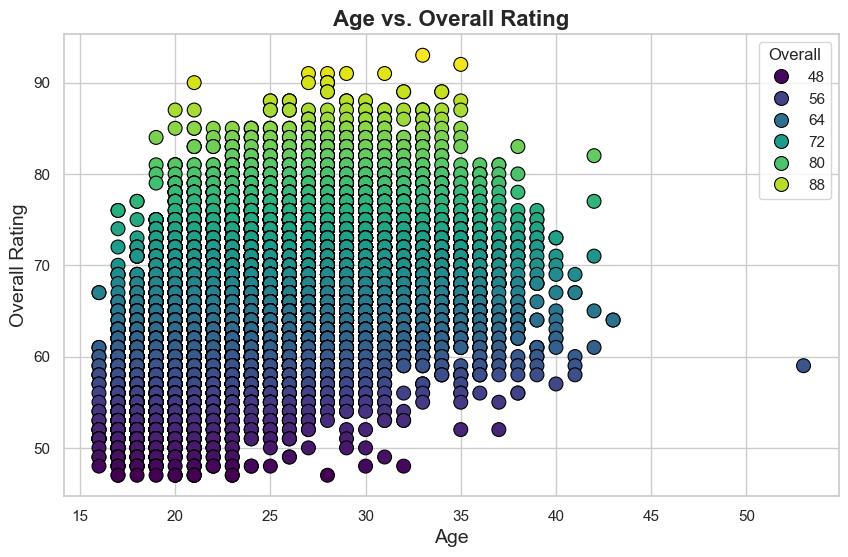

Peak Age for Player Performance: 42 with an average rating of 71.2


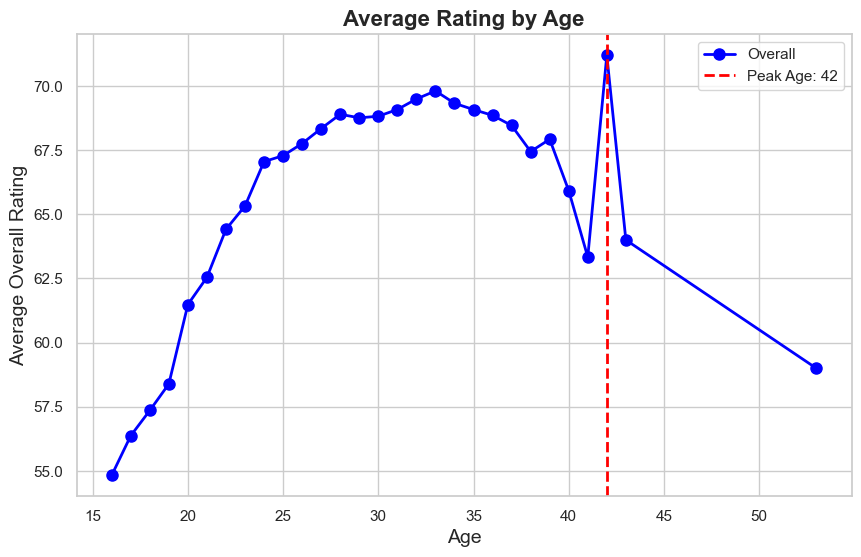

Average Age of Players: 25.19


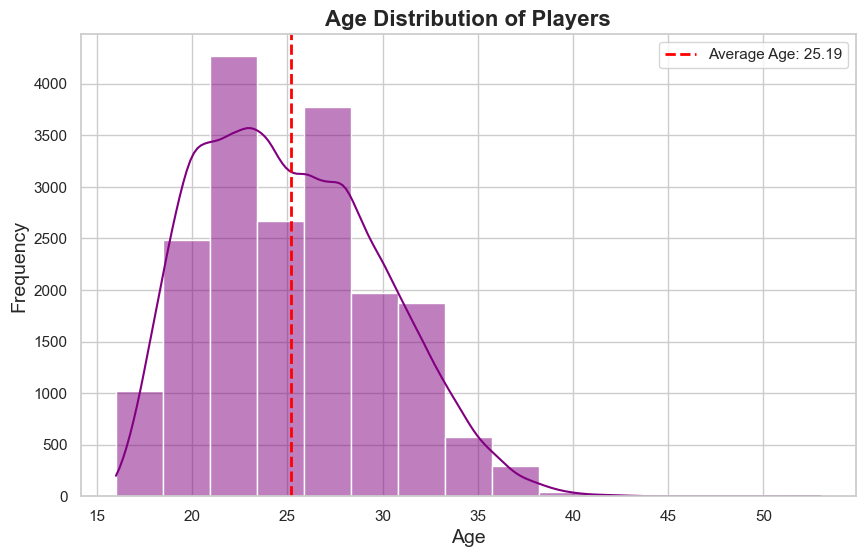

In [433]:
#1t question
data1 = data.copy()

# Set a style
sns.set(style="whitegrid")

# Correlation between Age and Overall Rating
correlation = data1['Age'].corr(data1['Overall'])
print(f"Correlation between Age and Overall Rating: {correlation}")

# Plotting Age vs. Overall Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Overall', data=data1, hue='Overall', palette='viridis', s=100, edgecolor='black')
plt.title('Age vs. Overall Rating', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.show()

# Determining the peak age for player performance
average_rating_by_age = data1.groupby('Age')['Overall'].mean()
peak_age = average_rating_by_age.idxmax()
peak_rating = average_rating_by_age.max()
print(f"Peak Age for Player Performance: {peak_age} with an average rating of {peak_rating}")

# Plotting Average Rating by Age
plt.figure(figsize=(10, 6))
average_rating_by_age.plot(kind='line', color='blue', marker='o', linewidth=2, markersize=8)
plt.title('Average Rating by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Average Overall Rating', fontsize=14)
plt.axvline(x=peak_age, color='red', linestyle='--', linewidth=2, label=f'Peak Age: {peak_age}')
plt.legend()
plt.grid(True)
plt.show()

# Calculating the average age of players in the dataset
average_age = data1['Age'].mean()
print(f"Average Age of Players: {average_age:.2f}")

# Plotting Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data1['Age'], bins=15, kde=True, color='purple')
plt.title('Age Distribution of Players', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=average_age, color='red', linestyle='--', linewidth=2, label=f'Average Age: {average_age:.2f}')
plt.legend()
plt.show()


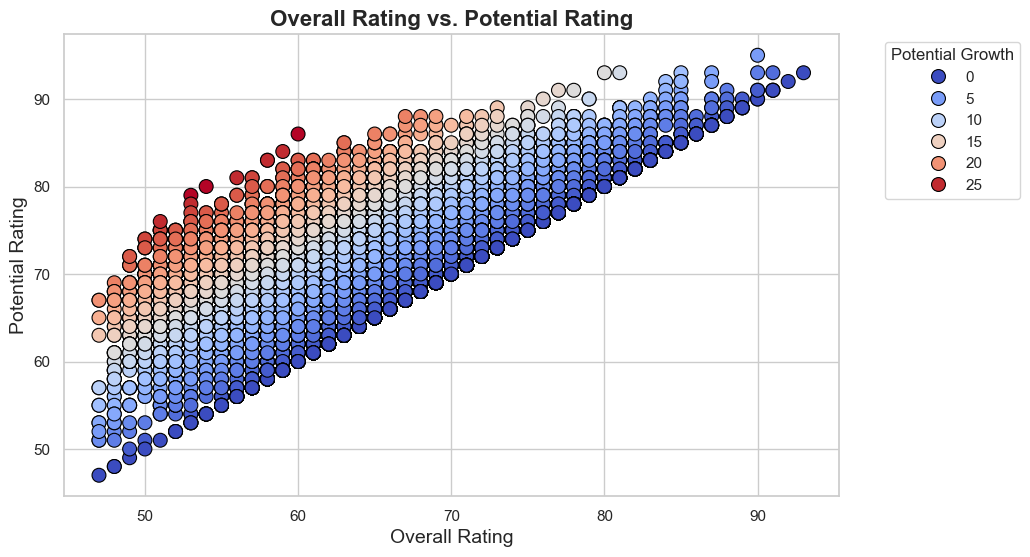

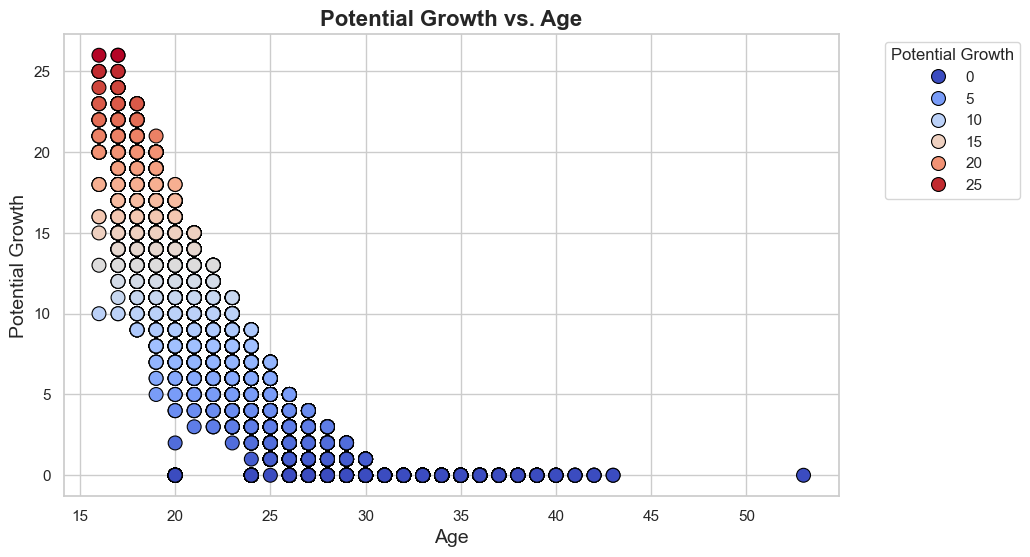

Top 10 Players with Highest Potential Growth:
               Name  Age  Overall  Potential  Potential_Growth
14827  B. Arrey-Mbi   17       60         86                26
17874   R. Richards   16       54         80                26
18121    A. Hajdari   17       53         79                26
15983       C. Riad   17       59         84                25
16289    O. Babuscu   16       58         83                25
16395     W. Faghir   16       58         83                25
17210      D. Leyva   17       56         81                25
18204    S. Auklend   17       53         78                25
18731  T. Gulliksen   16       51         76                25
16979      I. Touré   17       57         81                24


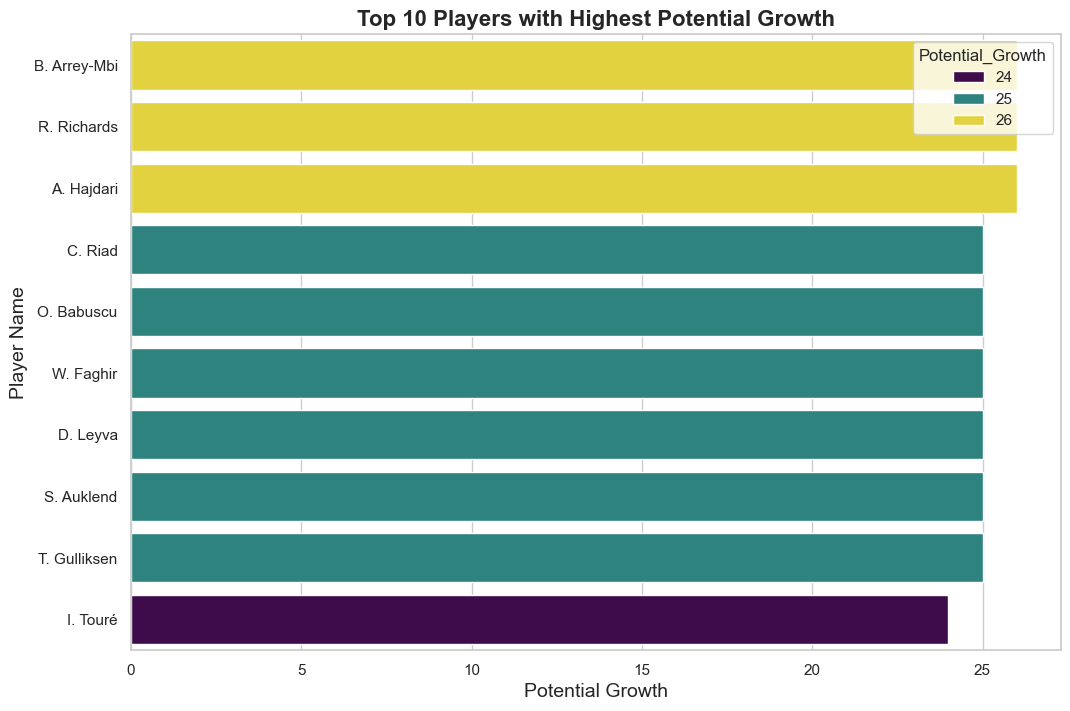

In [434]:
# 2nd question
# Calculate the difference between Potential and Overall rating
data1['Potential_Growth'] = data1['Potential'] - data1['Overall']

# 1. Difference between Overall and Potential Rating
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Overall', y='Potential', data=data1, hue='Potential_Growth', palette='coolwarm', s=100, edgecolor='black')
plt.title('Overall Rating vs. Potential Rating', fontsize=16, fontweight='bold')
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Potential Rating', fontsize=14)
plt.legend(title='Potential Growth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 2. Potential Growth vs. Age
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='Potential_Growth', data=data1, hue='Potential_Growth', palette='coolwarm', s=100, edgecolor='black')
plt.title('Potential Growth vs. Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Potential Growth', fontsize=14)
plt.legend(title='Potential Growth', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. Players with Highest Potential Growth
top_growth_players = data1.nlargest(10, 'Potential_Growth')

print("Top 10 Players with Highest Potential Growth:")
print(top_growth_players[['Name', 'Age', 'Overall', 'Potential', 'Potential_Growth']])

# Plotting Top 10 Players with Highest Potential Growth
plt.figure(figsize=(12, 8))
sns.barplot(x='Potential_Growth', y='Name', data=top_growth_players, hue='Potential_Growth', palette='viridis')
plt.title('Top 10 Players with Highest Potential Growth', fontsize=16, fontweight='bold')
plt.xlabel('Potential Growth', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.show()


In [435]:
# Calculate the difference between Potential and Overall rating
data['Potential_Growth'] = data['Potential'] - data['Overall']


C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1352207890.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_position.index, y=avg_rating_by_position.values, palette='Set2', errorbar=None)


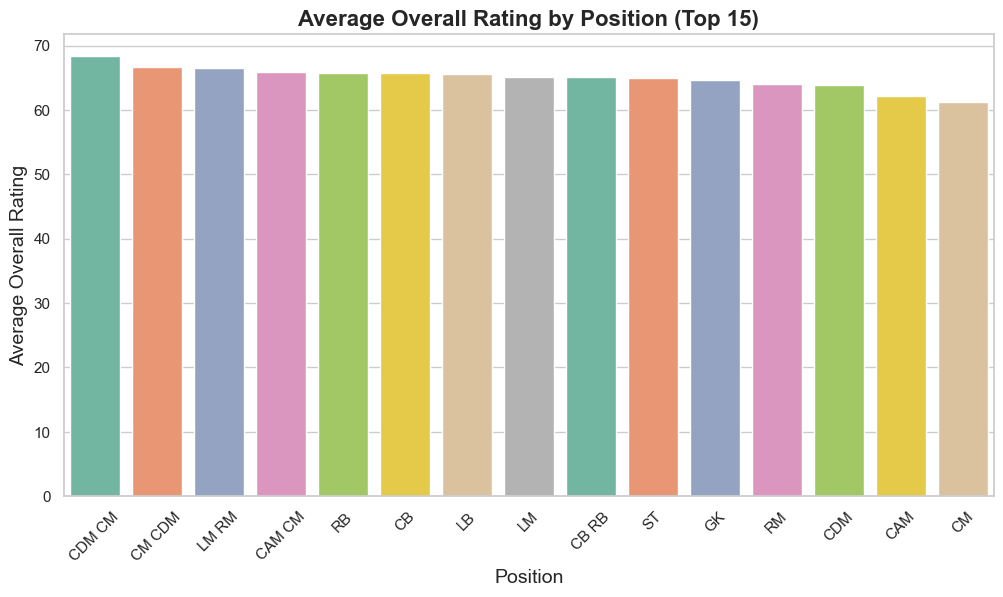

C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1352207890.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Positions', data=top_rated_players, palette='Pastel1')


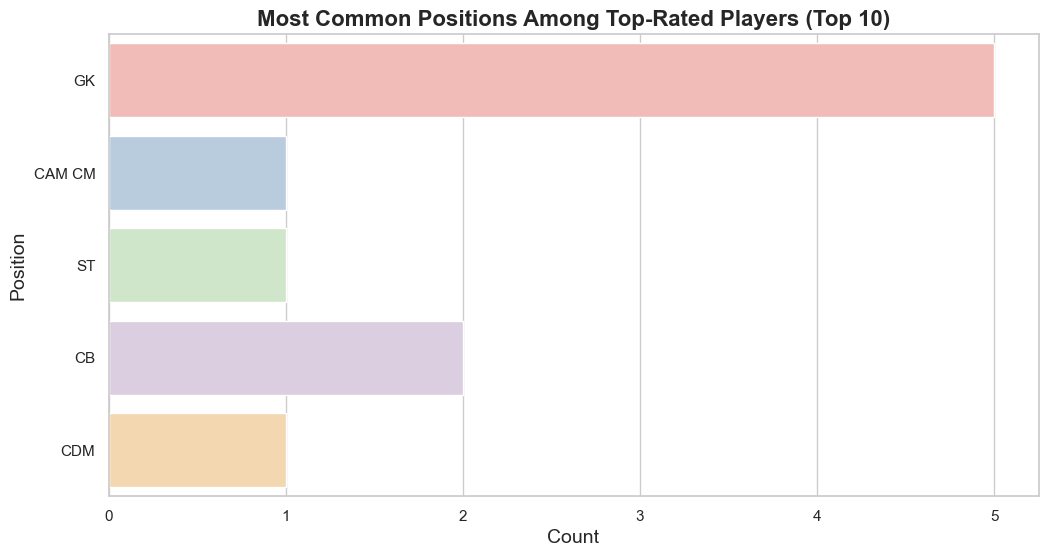

C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1352207890.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Positions', y='Potential_Growth', data=filtered_data, palette='Spectral')


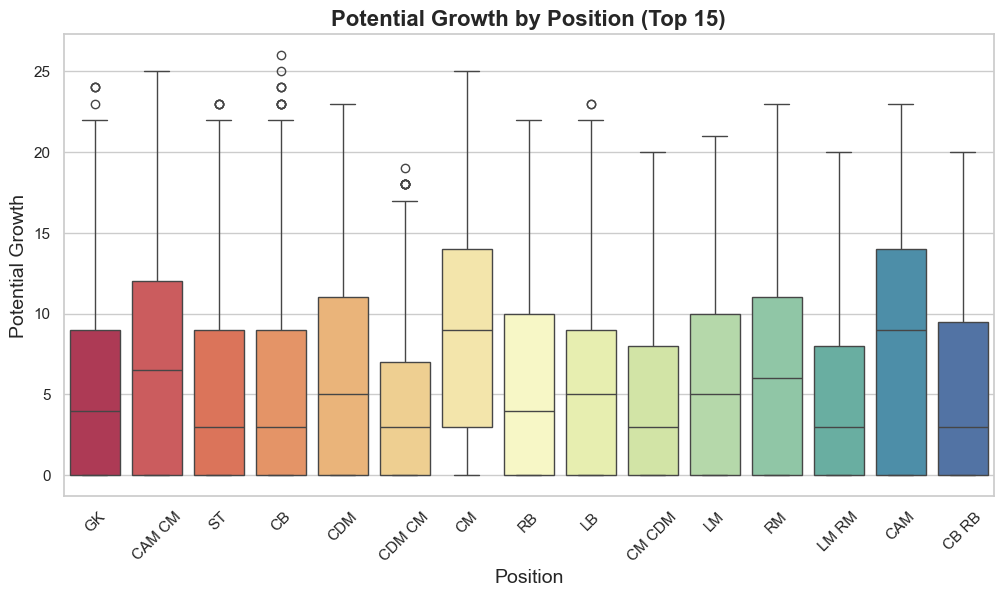

In [436]:


# Get the top 15 positions by count
top_positions = data['Positions'].value_counts().nlargest(15).index

# Filter data to include only these top 15 positions
filtered_data = data[data['Positions'].isin(top_positions)]

# 1. Average Rating by Position (Top 15)
plt.figure(figsize=(12, 6))
avg_rating_by_position = filtered_data.groupby('Positions')['Overall'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_by_position.index, y=avg_rating_by_position.values, palette='Set2', errorbar=None)
plt.title('Average Overall Rating by Position (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Overall Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# 2. Most Common Positions Among Top-Rated Players (Top 10)
top_rated_players = filtered_data.nlargest(10, 'Overall')
plt.figure(figsize=(12, 6))
sns.countplot(y='Positions', data=top_rated_players, palette='Pastel1')
plt.title('Most Common Positions Among Top-Rated Players (Top 10)', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Position', fontsize=14)
plt.show()

# 3. Potential Growth by Position (Top 15)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Positions', y='Potential_Growth', data=filtered_data, palette='Spectral')
plt.title('Potential Growth by Position (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Potential Growth', fontsize=14)
plt.xticks(rotation=45)
plt.show()


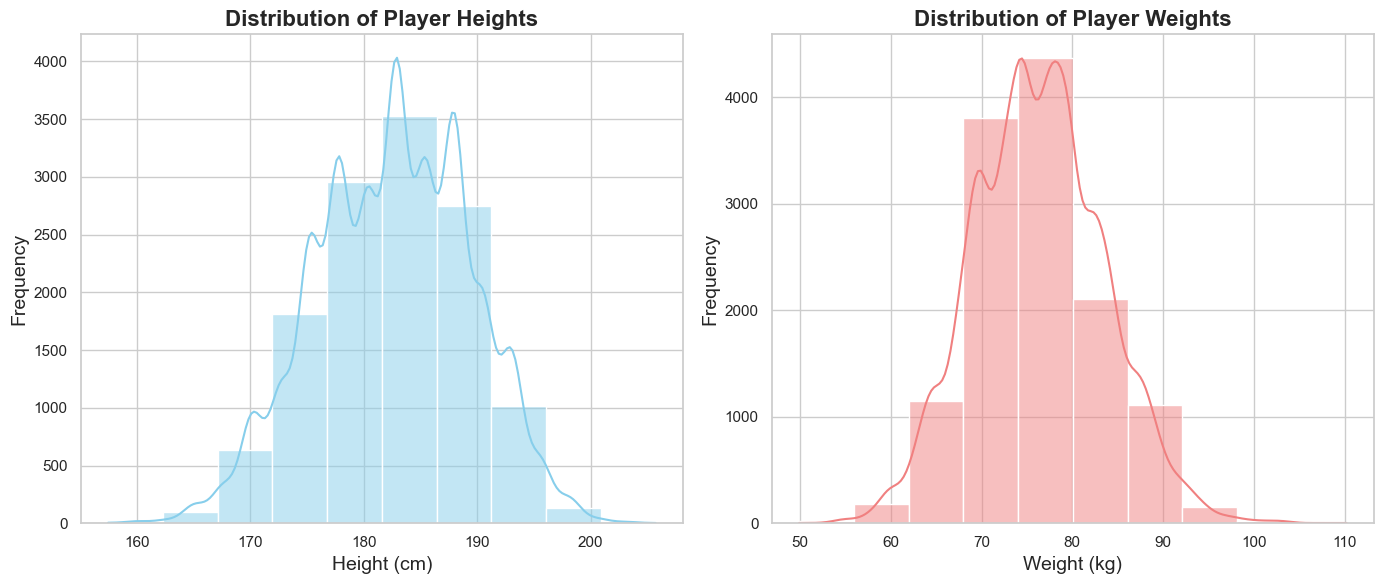

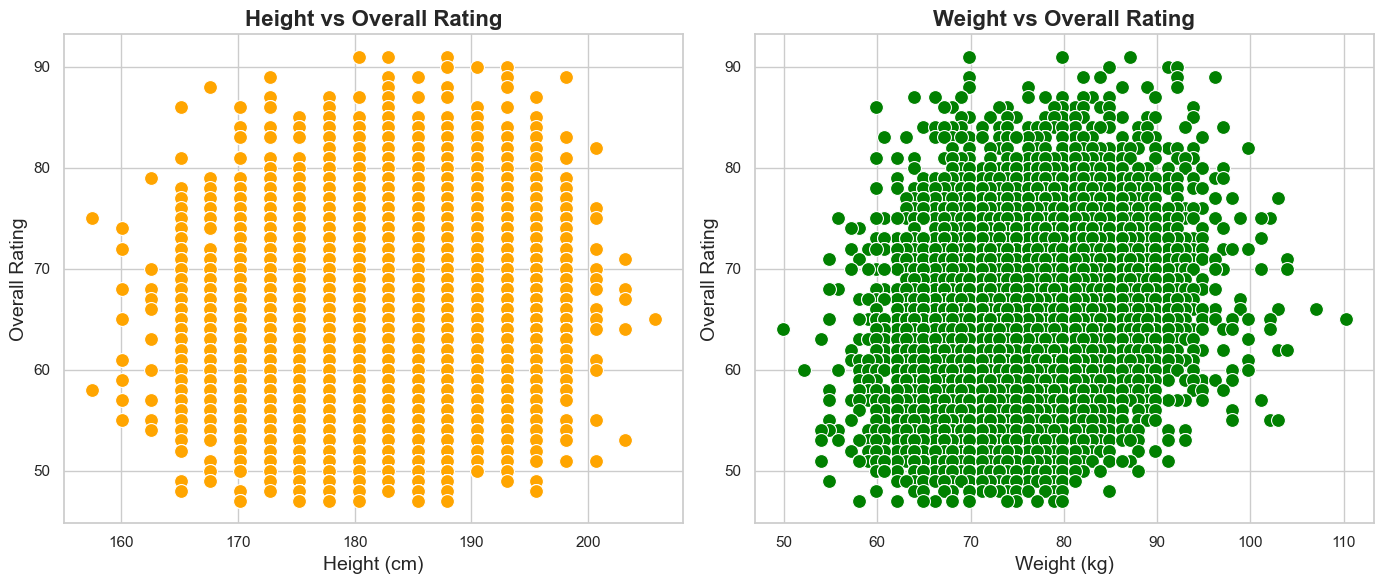

Correlation between Height and Overall Rating: 0.09
Correlation between Weight and Overall Rating: 0.20


C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1125813462.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Positions', y='Height_cm', data=filtered_data, palette='pastel')
C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1125813462.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Positions', y='Weight_kg', data=filtered_data, palette='pastel')


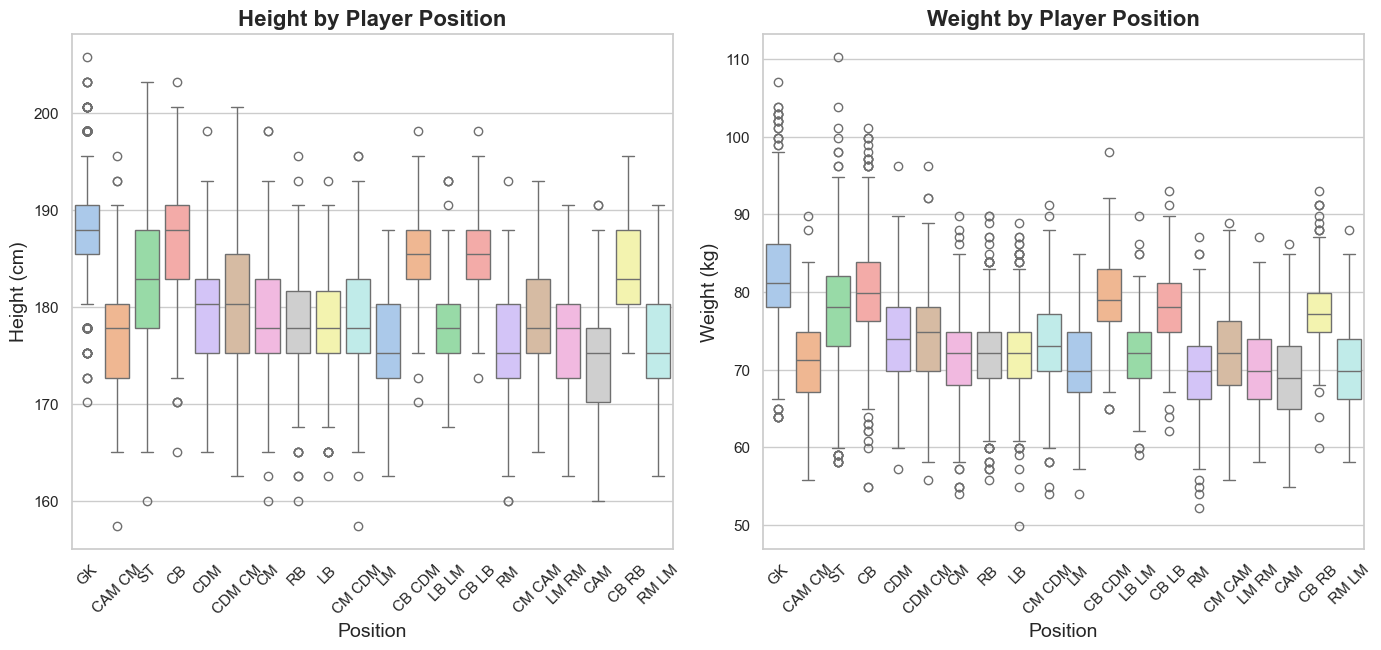

In [437]:
#5th
# Get the top 20 positions by count
top_positions = data['Positions'].value_counts().nlargest(20).index

# Filter data to include only these top 20 positions
filtered_data = data[data['Positions'].isin(top_positions)]

# 1. Distribution of Player Heights and Weights
plt.figure(figsize=(14, 6))

# Height Distribution
plt.subplot(1, 2, 1)
sns.histplot(filtered_data['Height_cm'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Player Heights', fontsize=16, fontweight='bold')
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Weight Distribution
plt.subplot(1, 2, 2)
sns.histplot(filtered_data['Weight_kg'], bins=10, kde=True, color='lightcoral')
plt.title('Distribution of Player Weights', fontsize=16, fontweight='bold')
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

# 2. Correlation Between Height/Weight and Overall Rating
plt.figure(figsize=(14, 6))

# Height vs Overall Rating
plt.subplot(1, 2, 1)
sns.scatterplot(x='Height_cm', y='Overall', data=filtered_data, color='orange', s=100)
plt.title('Height vs Overall Rating', fontsize=16, fontweight='bold')
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.grid(True)

# Weight vs Overall Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='Weight_kg', y='Overall', data=filtered_data, color='green', s=100)
plt.title('Weight vs Overall Rating', fontsize=16, fontweight='bold')
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate correlations
height_corr = filtered_data[['Height_cm', 'Overall']].corr().iloc[0, 1]
weight_corr = filtered_data[['Weight_kg', 'Overall']].corr().iloc[0, 1]
print(f'Correlation between Height and Overall Rating: {height_corr:.2f}')
print(f'Correlation between Weight and Overall Rating: {weight_corr:.2f}')

# 3. Physical Attributes by Position
plt.figure(figsize=(14, 12))

# Height by Position
plt.subplot(2, 2, 1)
sns.boxplot(x='Positions', y='Height_cm', data=filtered_data, palette='pastel')
plt.title('Height by Player Position', fontsize=16, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Height (cm)', fontsize=14)
plt.xticks(rotation=45)

# Weight by Position
plt.subplot(2, 2, 2)
sns.boxplot(x='Positions', y='Weight_kg', data=filtered_data, palette='pastel')
plt.title('Weight by Player Position', fontsize=16, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


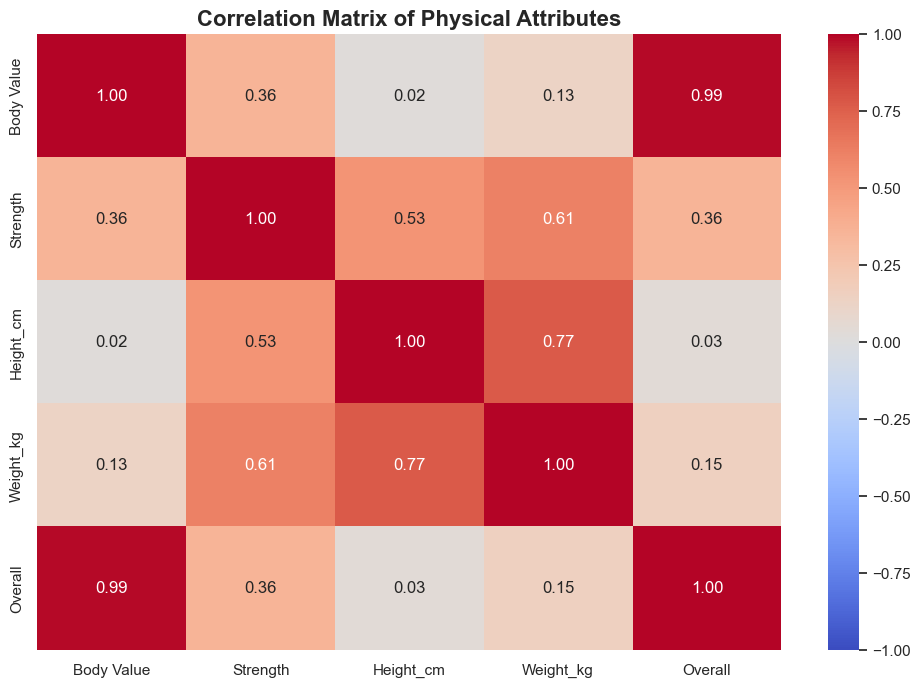

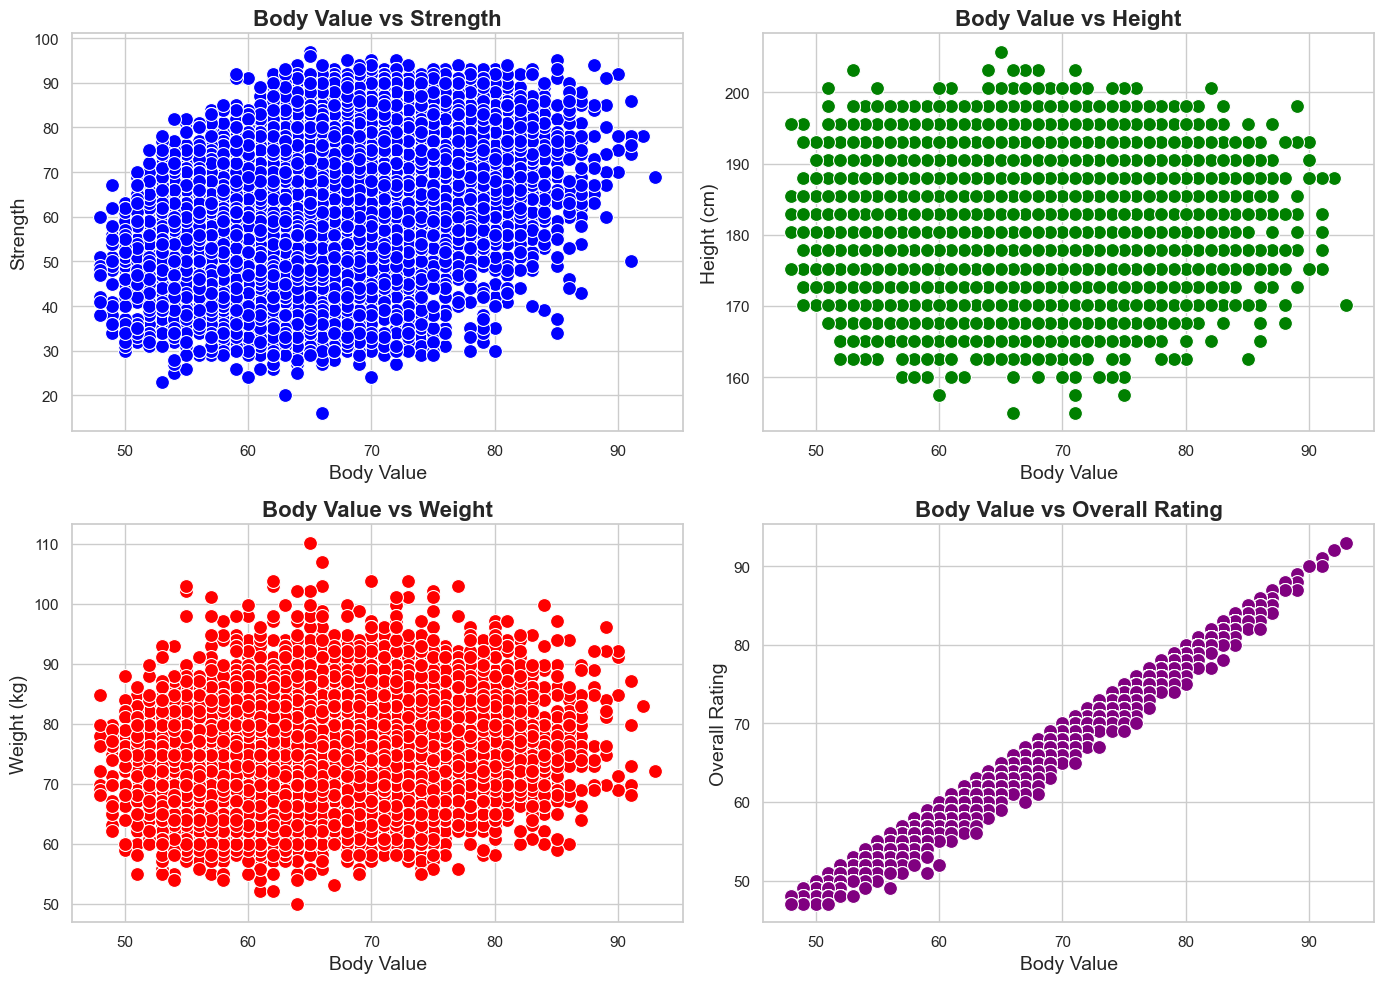

C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1254544446.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Positions', y='Body Value', data=filtered_data, palette='pastel')


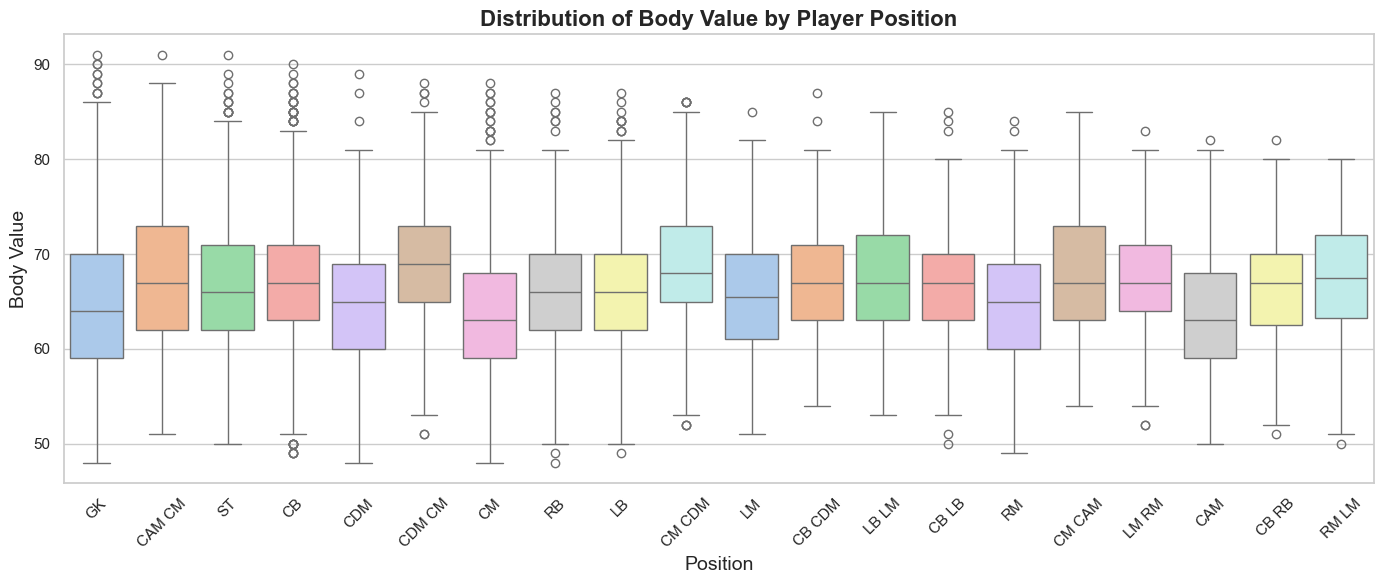

In [438]:
#6th

# 1. Correlation Analysis
plt.figure(figsize=(12, 8))

# Calculate correlations
correlation_data = data[['Body Value', 'Strength', 'Height_cm', 'Weight_kg', 'Overall']]
correlation_matrix = correlation_data.corr()

# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Physical Attributes', fontsize=16, fontweight='bold')
plt.show()

# Scatter plots for Body Value vs Other Attributes
plt.figure(figsize=(14, 10))

# Body Value vs Strength
plt.subplot(2, 2, 1)
sns.scatterplot(x='Body Value', y='Strength', data=data, color='blue', s=100)
plt.title('Body Value vs Strength', fontsize=16, fontweight='bold')
plt.xlabel('Body Value', fontsize=14)
plt.ylabel('Strength', fontsize=14)
plt.grid(True)

# Body Value vs Height
plt.subplot(2, 2, 2)
sns.scatterplot(x='Body Value', y='Height_cm', data=data, color='green', s=100)
plt.title('Body Value vs Height', fontsize=16, fontweight='bold')
plt.xlabel('Body Value', fontsize=14)
plt.ylabel('Height (cm)', fontsize=14)
plt.grid(True)

# Body Value vs Weight
plt.subplot(2, 2, 3)
sns.scatterplot(x='Body Value', y='Weight_kg', data=data, color='red', s=100)
plt.title('Body Value vs Weight', fontsize=16, fontweight='bold')
plt.xlabel('Body Value', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.grid(True)

# Body Value vs Overall Rating
plt.subplot(2, 2, 4)
sns.scatterplot(x='Body Value', y='Overall', data=data, color='purple', s=100)
plt.title('Body Value vs Overall Rating', fontsize=16, fontweight='bold')
plt.xlabel('Body Value', fontsize=14)
plt.ylabel('Overall Rating', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Distribution of Body Value by Position
plt.figure(figsize=(14, 6))

# Box plot for Body Value by Position
sns.boxplot(x='Positions', y='Body Value', data=filtered_data, palette='pastel')
plt.title('Distribution of Body Value by Player Position', fontsize=16, fontweight='bold')
plt.xlabel('Position', fontsize=14)
plt.ylabel('Body Value', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Top 15 teams with the highest average player ratings:
Team
FC Barcelona2004         93.0
FC Bayern München2014    91.0
FC Barcelona2014         90.0
Real Madrid2009          89.0
Manchester City2011      89.0
Real Madrid2005          89.0
Juventus2018             88.5
Real Madrid2014          88.0
Inter2012                88.0
Tottenham Hotspur2010    88.0
Tottenham Hotspur2012    87.0
Real Madrid2012          87.0
Juventus2005             87.0
FC Barcelona2008         86.5
Atlético Madrid2014      86.5
Name: Overall, dtype: float64


C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\2845993881.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_teams.index, y=top_15_teams.values, palette='Set3')


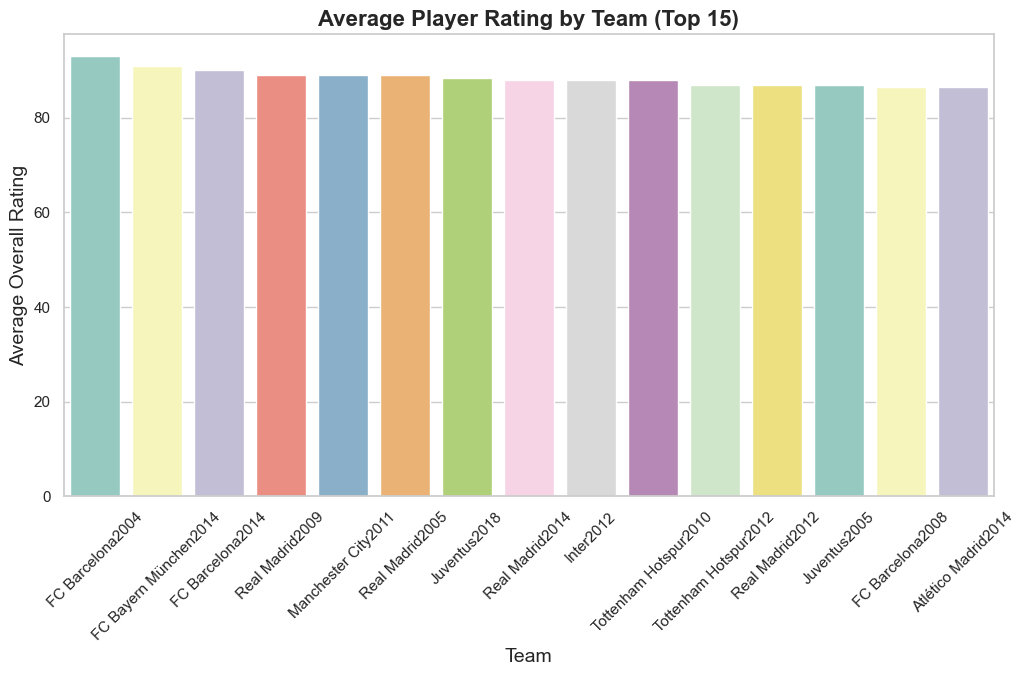

In [439]:
# Calculate the average player ratings for each team
team_avg_rating = data.groupby('Team')['Overall'].mean().sort_values(ascending=False)

# Select the top 15 teams with the highest average player ratings
top_15_teams = team_avg_rating.head(15)
print("Top 15 teams with the highest average player ratings:")
print(top_15_teams)

# Plot the average player ratings for the top 15 teams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_teams.index, y=top_15_teams.values, palette='Set3')
plt.title('Average Player Rating by Team (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Average Overall Rating', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [440]:

# Function to clean and convert currency values
def convert_currency(value):
    if pd.isnull(value):
        return 0
    value = value.replace('€', '').replace('K', '000').replace('M', '000000')
    return float(value)

# Apply the function to 'Value' and 'Wage' columns
data['Value'] = data['Value'].apply(convert_currency)
data['Wage'] = data['Wage'].apply(convert_currency)


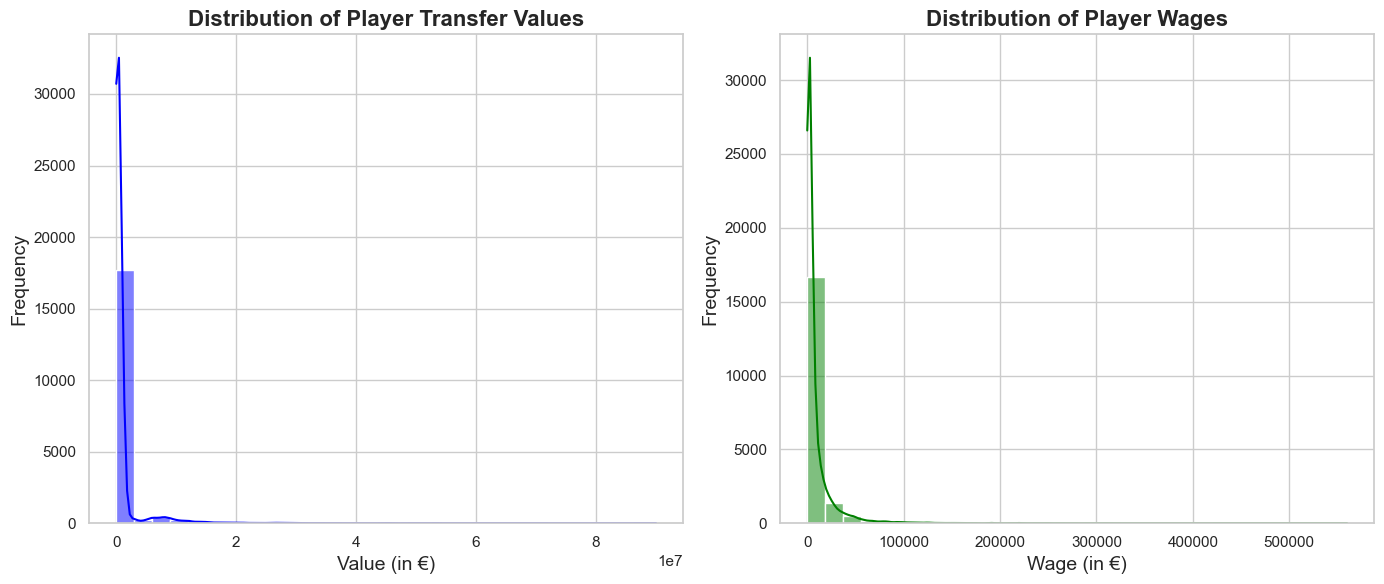

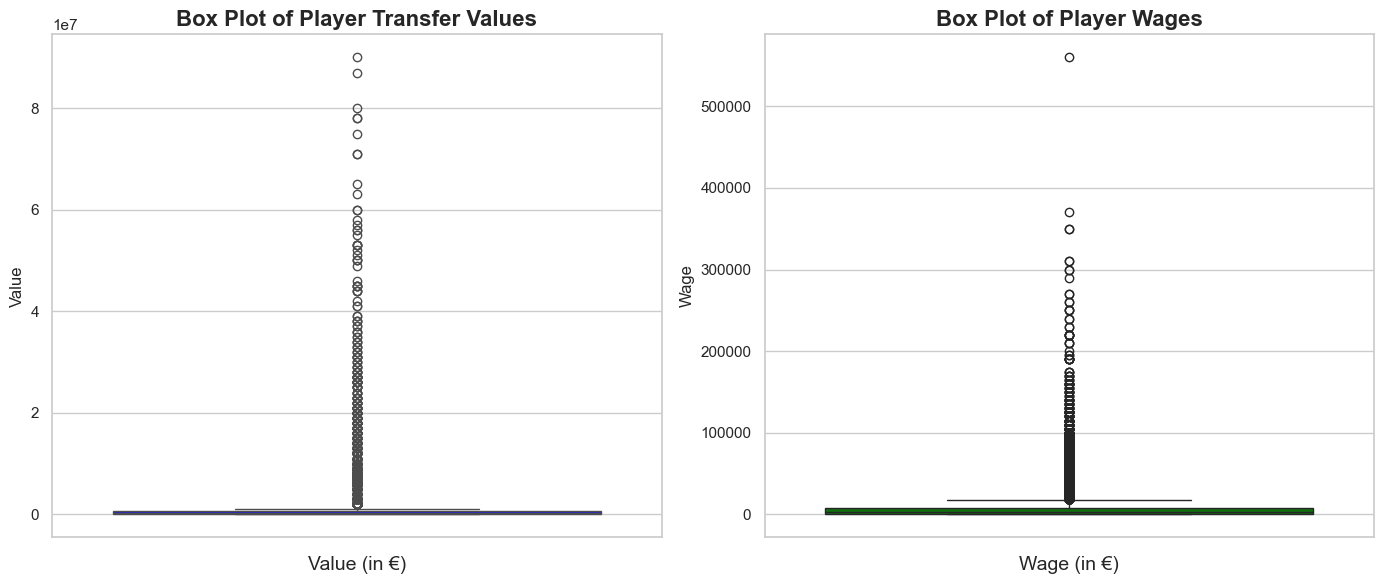

Correlation between Player Value and Overall Rating: 0.38


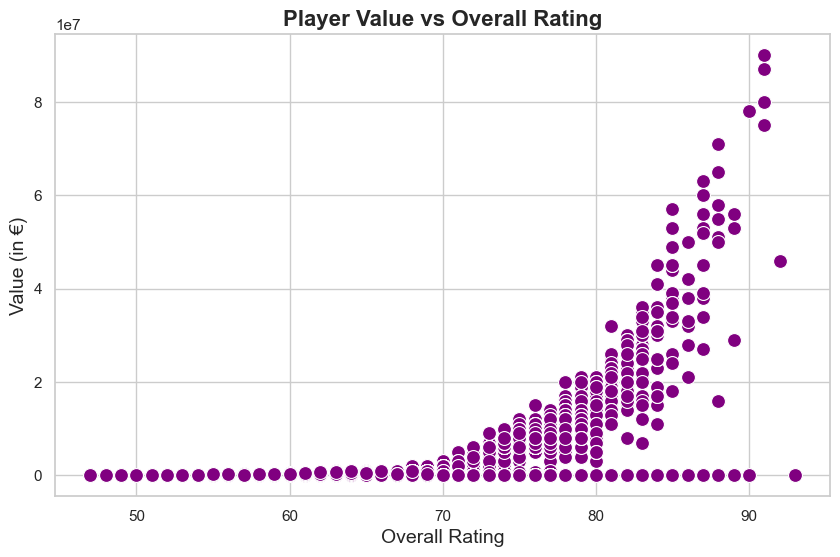

Players with the highest value-to-rating ratio:
                         LongName                     Team  Overall  \
4      Neymar da Silva Santos Jr.  Paris Saint-Germain2017       91   
3                 Kevin De Bruyne      Manchester City2015       91   
5              Robert Lewandowski    FC Bayern München2014       91   
8                   Mohamed Salah            Liverpool2017       90   
9                      Sadio Mané            Liverpool2016       90   
2                       Jan Oblak      Atlético Madrid2014       91   
20                   Paulo Dybala             Juventus2015       88   
23                     Harry Kane    Tottenham Hotspur2010       88   
19                 Joshua Kimmich    FC Bayern München2015       88   
33  Bruno Miguel Borges Fernandes    Manchester United2020       87   

         Value  Value_to_Rating_Ratio  
4   90000000.0          989010.989011  
3   87000000.0          956043.956044  
5   80000000.0          879120.879121  
8   780000

C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\1844728363.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value_to_Rating_Ratio', y='LongName', data=top_value_to_rating_ratio, palette='viridis')


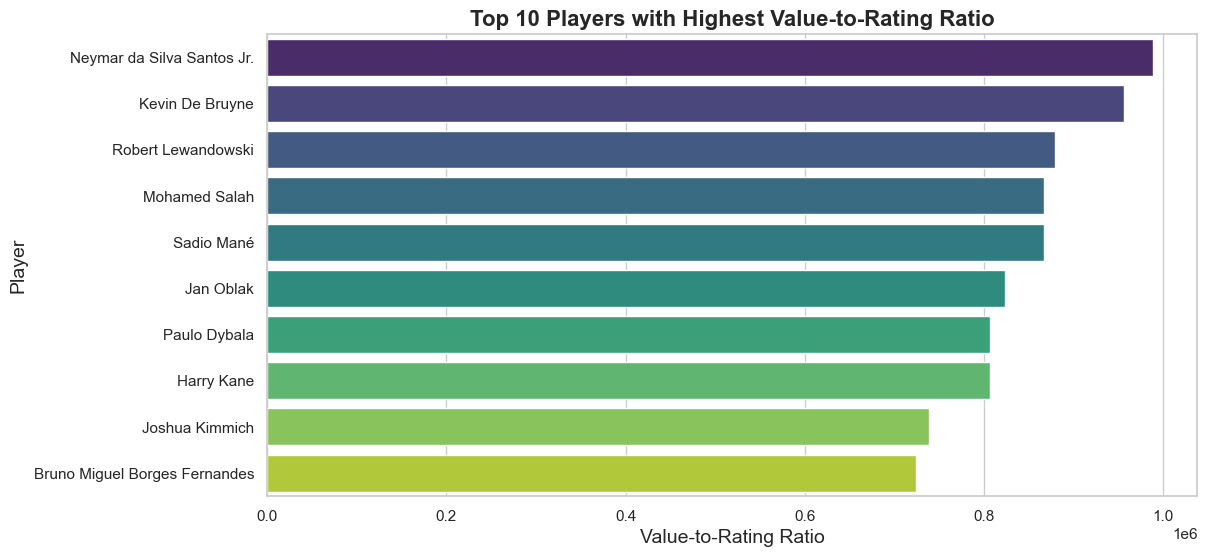

In [441]:

# Ensure 'Contract' column is handled properly
current_year = 2024
data['Contract'] = data['Contract'].fillna(str(current_year)).astype(int)
data['Contract_Length'] = data['Contract'] - current_year

# Plot the distribution of player transfer values and wages
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Value'], bins=30, kde=True, color='blue')
plt.title('Distribution of Player Transfer Values', fontsize=16, fontweight='bold')
plt.xlabel('Value (in €)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(data['Wage'], bins=30, kde=True, color='green')
plt.title('Distribution of Player Wages', fontsize=16, fontweight='bold')
plt.xlabel('Wage (in €)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

# Box plots for more insight
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data['Value'], color='blue')
plt.title('Box Plot of Player Transfer Values', fontsize=16, fontweight='bold')
plt.xlabel('Value (in €)', fontsize=14)

plt.subplot(1, 2, 2)
sns.boxplot(data['Wage'], color='green')
plt.title('Box Plot of Player Wages', fontsize=16, fontweight='bold')
plt.xlabel('Wage (in €)', fontsize=14)

plt.tight_layout()
plt.show()

# Calculate the correlation between player's value and their overall rating
value_overall_corr = data[['Value', 'Overall']].corr().iloc[0, 1]
print(f'Correlation between Player Value and Overall Rating: {value_overall_corr:.2f}')

# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall', y='Value', data=data, color='purple', s=100)
plt.title('Player Value vs Overall Rating', fontsize=16, fontweight='bold')
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Value (in €)', fontsize=14)
plt.grid(True)
plt.show()

# Calculate the value-to-rating ratio
data['Value_to_Rating_Ratio'] = data['Value'] / data['Overall']

# Identify players with the highest value-to-rating ratio
top_value_to_rating_ratio = data[['LongName', 'Team', 'Overall', 'Value', 'Value_to_Rating_Ratio']].sort_values(by='Value_to_Rating_Ratio', ascending=False).head(10)
print("Players with the highest value-to-rating ratio:")
print(top_value_to_rating_ratio)

# Bar plot for players with the highest value-to-rating ratio
plt.figure(figsize=(12, 6))
sns.barplot(x='Value_to_Rating_Ratio', y='LongName', data=top_value_to_rating_ratio, palette='viridis')
plt.title('Top 10 Players with Highest Value-to-Rating Ratio', fontsize=16, fontweight='bold')
plt.xlabel('Value-to-Rating Ratio', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.show()


In [444]:
data.columns

Index(['LongName', 'Nationality', 'Positions', 'Name', 'Age', 'Overall',
       'Potential', 'foot', 'Body Value', 'Balance Points', 'Growth', 'Joined',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'Weak Foot', 'Skill Moves', 'Attacking Work Rate',
       'Defensive Work Rate', 'International Reputation', 'Pace', 'Shooting',
       'Passing', 'Dribb

Top 15 Most Represented Nationalities:
Nationality
England          1704
Germany          1195
Spain            1065
France           1003
Argentina         943
Brazil            887
Japan             485
Netherlands       438
Italy             387
Sweden            380
United States     376
China PR          364
Mexico            362
Norway            362
Portugal          361
Name: count, dtype: int64


C:\Users\yuria\AppData\Local\Temp\ipykernel_13972\3776970124.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')


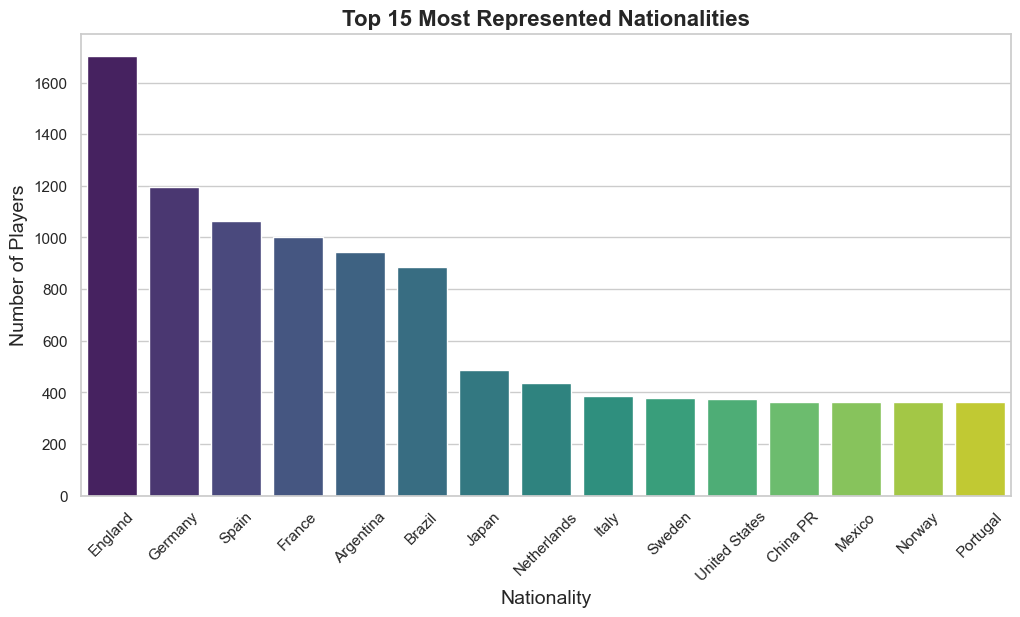

In [457]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# 1. Most Represented Nationalities (Top 15)
nationality_counts = data['Nationality'].value_counts().head(15)
print("Top 15 Most Represented Nationalities:")
print(nationality_counts)

# Bar plot of top 15 most represented nationalities
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_counts.index, y=nationality_counts.values, palette='viridis')
plt.title('Top 15 Most Represented Nationalities', fontsize=16, fontweight='bold')
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()








# Like this we can use data analytics as the tool to get our answers as writtena and showcasen above...!